<a href="https://colab.research.google.com/github/ajayerumalla1/Food-Delivery-Time-Estimation/blob/main/Regression_Project_ML_12_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('/content/Food_Delivery_Times.csv')

In [34]:
df.shape

(1000, 9)

In [35]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [37]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [38]:
# Checking count of missing values of each column.
df.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [39]:
# Checking percentage of missing values of each column.
df.isna().sum()/len(df)*100

,0
Order_ID,0.0
Distance_km,0.0
Weather,3.0
Traffic_Level,3.0
Time_of_Day,3.0
Vehicle_Type,0.0
Preparation_Time_min,0.0
Courier_Experience_yrs,3.0
Delivery_Time_min,0.0


In [40]:
df['Courier_Experience_yrs'].value_counts()

,count
Courier_Experience_yrs,
6.0,109
9.0,108
1.0,107
8.0,101
2.0,99
4.0,94
0.0,91
7.0,91
5.0,90


In [41]:
# As there are only a few missing values, filling missing values with simple imputers like mode for categorical columns and median for numerical columns

df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [43]:
# Separating numerical column for further analysis.
num_cols = ['Distance_km', 'Preparation_Time_min','Courier_Experience_yrs']

In [44]:
# Dropping 'Order_ID' column as it is not important for model building.
df = df.drop(columns=['Order_ID'])

**Univariate Analysis**

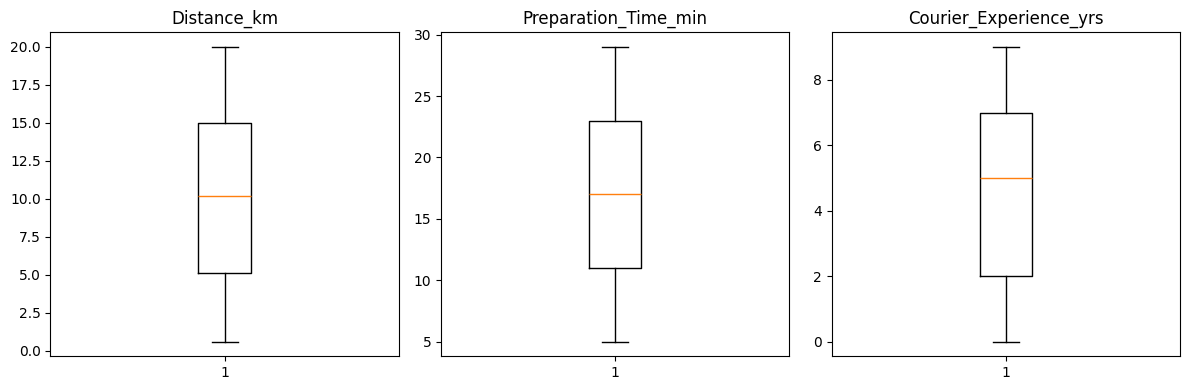

In [45]:
# Numerical columns
# Distance_km, Preparation_Time_min, Courier_Experience_yrs
fig, axes = plt.subplots(1,3, figsize=(12,4))
for ax, col in zip(axes, num_cols):
  ax.boxplot(df[col])
  ax.set_title(col)
plt.tight_layout()
plt.show()

In [46]:
# Numerical columns doesn't have outliers

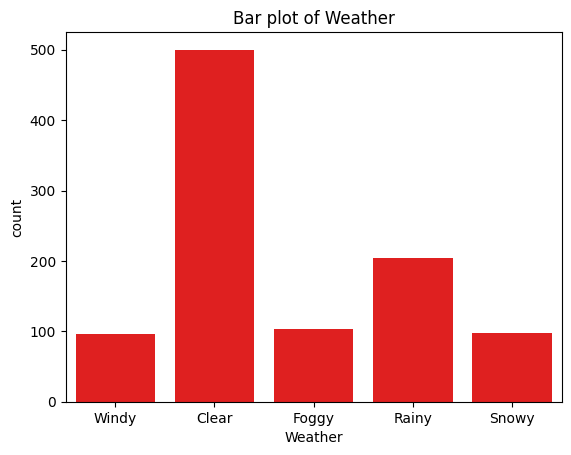

In [47]:
# Categorical columns
# i. Weather
sns.countplot(x= df['Weather'], color='red')
plt.title("Bar plot of Weather")
plt.show()

In [48]:
# Most of the orderes are placed when the weather condition is clear.

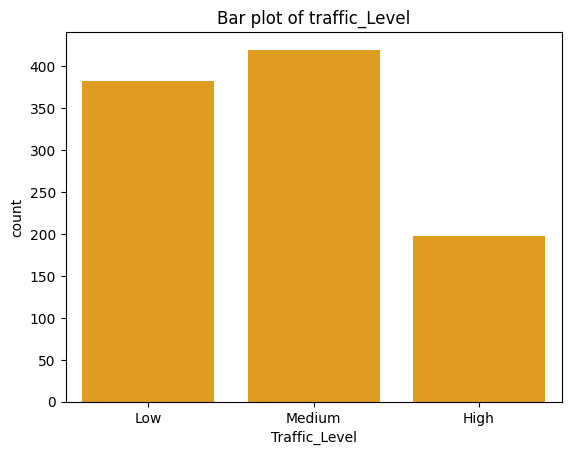

In [49]:
# Categorical columns
# ii. Traffic_Level
sns.countplot(x= df['Traffic_Level'], color='orange')
plt.title("Bar plot of traffic_Level")
plt.show()

In [50]:
# There is imbalance in the Traffic_Level column Traffic_Level with value as High are low compared to Low and Medium.

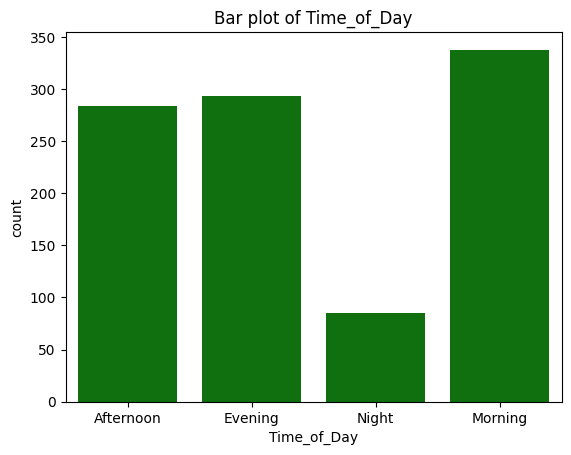

In [51]:
# iii. Time_of_Day
sns.countplot(x= df['Time_of_Day'], color='green')
plt.title("Bar plot of Time_of_Day")
plt.show()

In [52]:
# In Time_of_Day column also there is class imbalance Night class values are low compared to other classes.

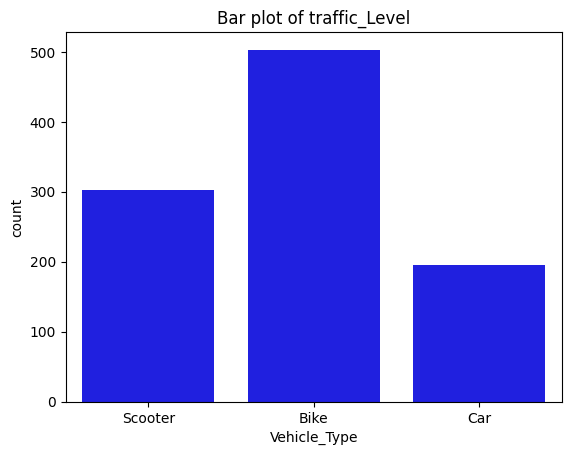

In [53]:
# iv. Vehicle_Type
sns.countplot(x= df['Vehicle_Type'], color='blue')
plt.title("Bar plot of traffic_Level")
plt.show()

In [54]:
# Vehicle type of Bikes are more compared to Scooter and Car.

**Bivariate Analysis**

Text(0.5, 1.0, 'Delivery Time(min) vs Distance (km)')

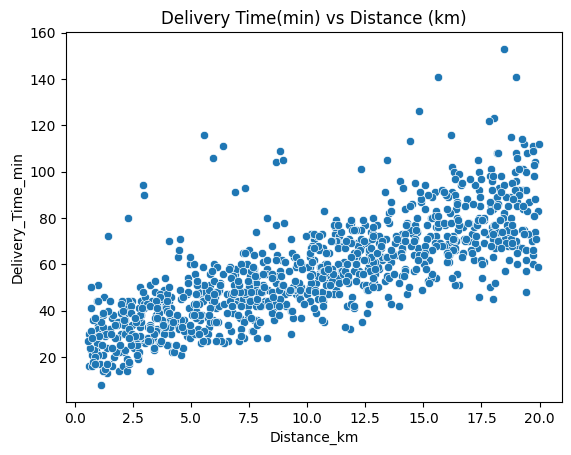

In [68]:
# Delivery_Time_min vs Distance_km
sns.scatterplot(x='Distance_km', y='Delivery_Time_min', data=df)
plt.title('Delivery Time(min) vs Distance (km)')

In [71]:
# As the Distance_km increases Delivery_Time_min increases

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 1000 non-null   object 
 2   Traffic_Level           1000 non-null   object 
 3   Time_of_Day             1000 non-null   object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  1000 non-null   float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [73]:
# Multivariate Analysis
corr_matrix = df.select_dtypes(include='number').corr()
print(corr_matrix)

                        Distance_km  Preparation_Time_min  \
Distance_km                1.000000             -0.009037   
Preparation_Time_min      -0.009037              1.000000   
Courier_Experience_yrs    -0.007534             -0.030842   
Delivery_Time_min          0.780998              0.307350   

                        Courier_Experience_yrs  Delivery_Time_min  
Distance_km                          -0.007534           0.780998  
Preparation_Time_min                 -0.030842           0.307350  
Courier_Experience_yrs                1.000000          -0.089111  
Delivery_Time_min                    -0.089111           1.000000  


In [74]:
# From the above correlation coefficient matrix we can see that there is a linear relationship between some input columns like Distance_km, Delivery_Time_min.

In [75]:
df['Weather'].value_counts()

,count
Weather,
Clear,500
Rainy,204
Foggy,103
Snowy,97
Windy,96


In [76]:
df['Traffic_Level'].value_counts()

,count
Traffic_Level,
Medium,420
Low,383
High,197


In [77]:
df['Time_of_Day'].value_counts()

,count
Time_of_Day,
Morning,338
Evening,293
Afternoon,284
Night,85


In [78]:
df['Vehicle_Type'].value_counts()

,count
Vehicle_Type,
Bike,503
Scooter,302
Car,195


In [79]:
# Traget variable
y = df['Delivery_Time_min']
print(y.shape)

(1000,)


In [80]:
# Input varibales
X = df.drop(columns=['Delivery_Time_min'])
print(X.shape)

(1000, 7)


In [81]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 7)
(200, 7)
(800,)
(200,)


In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             800 non-null    float64
 1   Weather                 800 non-null    object 
 2   Traffic_Level           800 non-null    object 
 3   Time_of_Day             800 non-null    object 
 4   Vehicle_Type            800 non-null    object 
 5   Preparation_Time_min    800 non-null    int64  
 6   Courier_Experience_yrs  800 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 50.0+ KB


In [84]:
# Preprocessing and creating pipeline
# Encoding Weather, Time_of_Day, and Vehicle_Type with onehot encoder as there is no importance for order of the categories, and encoding Traffic_Level with Ordinal Encoder for this order is important.
# Using ensemble model XGBRegressor for the regression task because it internally uses Decision Trees and DT's select which features important for the task, and they can handle missing values and outliers effectively.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
preprocessing = ColumnTransformer(transformers = [('ohe',OneHotEncoder(), [1,3,4]), ('ordinal', OrdinalEncoder(), [2])], remainder='passthrough')
dt_pipe = Pipeline(steps=[('preprocessing', preprocessing), ('dtr', DecisionTreeRegressor(random_state=42))])

In [85]:
# Model Training using DecisionTreeregressor
dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  [1, 3, 4]),
                                                 ('ordinal', OrdinalEncoder(),
                                                  [2])])),
                ('dtr', DecisionTreeRegressor(random_state=42))])

In [88]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
y_pred = dt_pipe.predict(X_test)
print("MSE :", mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
print("Root Mean Squared Error", root_mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE : 245.665
MAE: 10.805
Root Mean Squared Error 15.673704093161897
R2: 0.45191830545227674


In [ ]:
# For this Delivery time prediction task we are taking Mean Absolute Error(MAE) as evaluation metric. Because,
# It is to interprete.
# It treats all the errors linearly.
# We can communicate easily with clients by saying on an average the order is late by some minutes directly.
# By considering above reasons we are taking mae as evaluation metric for this task.

In [ ]:
# As the model's mae is 10.8 which is very high for orders with small distances we can build another model based on decison trees.

In [89]:
# Building the model with XGBregressor
from xgboost import XGBRegressor
pipe = Pipeline(steps=[('preprocessing', preprocessing), ('xgbr', XGBRegressor(random_state=42))])

In [90]:
# Model training using XGBRegressor
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  [1, 3, 4]),
                                                 ('ordinal', OrdinalEncoder(),
                                                  [2])])),
                ('xgbr',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=Fal...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [94]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
y_pred = pipe.predict(X_test)
print("MSE :", mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
print("Root Mean Squared Error: ", root_mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE : 121.58826446533203
MAE: 7.922896862030029
Root Mean Squared Error:  11.02670669555664
R2: 0.728735089302063


In [92]:
# Compared to DecisionTreeRegressor the mae has decreased significantly in XGBRegressor. So we are choosing this model and going further for hyperparameter tuning.

In [95]:
# Mean Absolute Error is 7.9 trying to reduce the error by finding best parameters using GridSearchCV.
# Hyperparamter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    "xgbr__n_estimators": [300, 600, 900],
    "xgbr__learning_rate": [0.01, 0.03, 0.05],
    "xgbr__max_depth": [4, 6, 8],
    "xgbr__min_child_weight": [1, 3],
    "xgbr__subsample": [0.8, 1.0],
   # "xgbr__colsample_bytree": [0.8, 1.0],
    "xgbr__reg_lambda": [0.0, 1.0, 5.0],
}
gcv = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",   # or 'neg_root_mean_squared_error' / 'r2'
    cv=5,
    n_jobs=-1,
    verbose=1
)

gcv.fit(X_train, y_train)

print("Best CV MAE:", -gcv.best_score_)
print("Best Params:", gcv.best_params_)
best_model = gcv.best_estimator_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best CV MAE: 7.326363658905029
Best Params: {'xgbr__learning_rate': 0.01, 'xgbr__max_depth': 4, 'xgbr__min_child_weight': 3, 'xgbr__n_estimators': 600, 'xgbr__reg_lambda': 5.0, 'xgbr__subsample': 0.8}


In [96]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = best_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 84.87413787841797
RMSE: 9.21271609670123
MAE: 6.391872406005859
R2: 0.8106447458267212


In [97]:
# From the above results we can observe that the mae, rmaehas reduced and r2 score has improved which indicates the model is improved it's performance.
# So we can use this model for deployment.

In [98]:
!pip install joblib

In [100]:
import joblib

joblib.dump(best_model, "Time_Estimation_Model.pkl")

['Time_Estimation_Model.pkl']

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = best_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 84.87413787841797
RMSE: 9.21271609670123
MAE: 6.391872406005859
R2: 0.8106447458267212


In [102]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [103]:
# Trying another model called CatBoostRegressor which can handle categorical data effectively.

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

cat_cols = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

model = CatBoostRegressor(
    iterations=800,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=3,
    verbose=0
)

model.fit(X_train, y_train, cat_features=cat_cols)
y_pred = model.predict(X_test)

print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("R2  :", r2_score(y_test, y_pred))


MSE : 81.32017165475747
RMSE: 9.017769771665135
MAE : 6.365732189993769
R2  : 0.8185736776445517


In [104]:
# catBoostRegressor giving slightly more improvised results.

In [105]:
# Dataset Download after cleaning
from google.colab import files
df.to_csv('Food_Delivery_Times_Cleaned.csv', index=False)
files.download('Food_Delivery_Times_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>